# Web Scraping - Case_Oscar Speech History_ACTOR IN A LEAD ROLE.
<p>Prepared by: <a href = 'https://github.com/sagsshakya'>Sagun Shakya</a></p>

- GITAM Institute of Science.

### Importing necessary libraries.

In [1]:
import requests
from bs4 import BeautifulSoup as BS

### Extracting all URLs from the webpage using for loop.

In [118]:
urlList = ['http://aaspeechesdb.oscars.org/results.aspx?AC=NEXT_RECORD&XC=/results.aspx&BU=http%3A%2F%2Faaspeechesdb.oscars.org%2F&TN=aatrans&SN=AUTO1984&SE=789&RN=' + str(ii) + '&MR=0&TR=0&TX=1000&ES=0&CS=0&XP=&RF=WebReportList&EF=&DF=WebReportOscars&RL=0&EL=0&DL=0&NP=255&ID=&MF=oscarsmsg.ini&MQ=&TI=0&DT=&ST=0&IR=0&NR=0&NB=0&SV=0&SS=0&BG=&FG=&QS=&OEX=ISO-8859-1&OEH=utf-8' for ii in range(28+1)]

In [120]:
url1990 = ['http://aaspeechesdb.oscars.org/results.aspx?AC=PREV_RECORD&XC=/results.aspx&BU=http%3A%2F%2Faaspeechesdb.oscars.org%2F&TN=aatrans&SN=AUTO1984&SE=789&RN=1&MR=0&TR=0&TX=1000&ES=0&CS=0&XP=&RF=WebReportList&EF=&DF=WebReportOscars&RL=0&EL=0&DL=0&NP=255&ID=&MF=oscarsmsg.ini&MQ=&TI=0&DT=&ST=0&IR=0&NR=1&NB=0&SV=0&SS=0&BG=&FG=&QS=&OEX=ISO-8859-1&OEH=utf-8']

In [121]:
urlList = url1990 + urlList

In [122]:
yearList = [ii for ii in range(1990, 2019+1)]

### Converting the URL list into DataFrame.

In [123]:
import pandas as pd

In [124]:
urldf = pd.DataFrame({'URL': urlList}, index = yearList)
urldf

,URL
1990,http://aaspeechesdb.oscars.org/results.aspx?AC...
1991,http://aaspeechesdb.oscars.org/results.aspx?AC...
1992,http://aaspeechesdb.oscars.org/results.aspx?AC...
1993,http://aaspeechesdb.oscars.org/results.aspx?AC...
1994,http://aaspeechesdb.oscars.org/results.aspx?AC...
1995,http://aaspeechesdb.oscars.org/results.aspx?AC...
1996,http://aaspeechesdb.oscars.org/results.aspx?AC...
1997,http://aaspeechesdb.oscars.org/results.aspx?AC...
1998,http://aaspeechesdb.oscars.org/results.aspx?AC...
1999,http://aaspeechesdb.oscars.org/results.aspx?AC...


## Scraping the required data.

In [125]:
scriptList = []
movieList = []
for ii in urldf.index.values:
    url = urldf.loc[ii][0]
    page = requests.get(url)
    soup = BS(page.text, 'html.parser')

    script = soup.find('p', class_ = 'MInormal').text
    scriptList.append(script)
    
    mov = soup.find_all('strong')
    movieList.append(mov[2].text)
    


### Winner List.

In [126]:
winnerList = [scriptList[ii].split(':')[0] for ii in range(len(scriptList))]

# Data Cleaning.
for ii in range(len(winnerList)):
    winnerList[ii] = winnerList[ii].replace(winnerList[ii][:],winnerList[ii][1:])

winnerList[:5]

['JEREMY IRONS', 'ANTHONY HOPKINS', 'AL PACINO', 'TOM HANKS', 'TOM HANKS']

### Speech List.

In [127]:
speechList = [scriptList[ii].split(':')[1] for ii in range(len(scriptList))]

# Data Cleaning.
for ii in range(len(speechList)):
    speechList[ii] = speechList[ii].replace(speechList[ii][0],'')
for ii in range(len(speechList)):
    speechList[ii] = speechList[ii].replace(speechList[ii][0],'')

speechList[:2]

["This is great.  Thank you, the Academy, and thank you, everybody who's wished me well, for this.  Specifically thank you, Warner Bros., Sovereign Pictures, Ed Pressman, Barbet Schroeder, Luciano Tovoli, our lighting cameraman.  People who made me look like that, Allen Weisinger and Dick Smith.  Thank you, my co-stars Ron Silver and Glenn, for finally persuading me to do it.  Thank you, Fred Specktor, Anne Hutton, Sally Fischer.  Thank you also, and some of you may understand why, thank you, David Cronenberg.  And lastly, if I may cut the call of a telephone to London where my wife is trying to keep awake in a hotel bedroom, I wish you were here to help me carry this because you helped me win it.  Thank you all.",
 "My God.  I can't believe it.  This is really unexpected.  It's a great honor to be here, especially with such great actors like Nick Nolte and Warren Beatty and Robin Williams, Robert De Niro.  First of all, before I say on, I want to say hello to my mother.  She's in Wale

### Winning movie List.

In [128]:
# Data Cleaning.
for ii in range(len(movieList)):
    movieList[ii] = movieList[ii].replace(movieList[ii][0], '')
    
movieList[:5]

['ReversalofFortune',
 'TheSilenceoftheLambs',
 'ScentofaWoman',
 'Philadelphia',
 'ForrestGump']

### Converting into DataFrame.

In [129]:
oscars = pd.DataFrame({'Winner': winnerList, 
                       'Movie': movieList,
                       'Speech': speechList, },
                      index = urldf.index.values)
oscars.head()

,Winner,Movie,Speech
1990,JEREMY IRONS,ReversalofFortune,"This is great. Thank you, the Academy, and th..."
1991,ANTHONY HOPKINS,TheSilenceoftheLambs,My God. I can't believe it. This is really u...
1992,AL PACINO,ScentofaWoman,You broke my streak. The last... I was at an ...
1993,TOM HANKS,Philadelphia,Here's what I know. I could not be standing h...
1994,TOM HANKS,ForrestGump,Thank you. I'm standing here in lieu of my fe...


In [130]:
oscars.shape

(30, 3)

In [131]:
df = oscars[['Speech']]
df.head()

,Speech
1990,"This is great. Thank you, the Academy, and th..."
1991,My God. I can't believe it. This is really u...
1992,You broke my streak. The last... I was at an ...
1993,Here's what I know. I could not be standing h...
1994,Thank you. I'm standing here in lieu of my fe...


### Modifying the Speech to remove punctuations, commas and ellipsis.

In [132]:
new_speech = []
for ii in range(len(df['Speech'])):
    b = df['Speech'].values[ii]
    b = b.replace('.', '')
    b = b.replace(',','')
    new_speech.append(b)
    
df['SpeechMod'] = new_speech
df.head(2)

C:\Users\Habeeb\PycharmProjects\SagunShakya\venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Speech,SpeechMod
1990,"This is great. Thank you, the Academy, and th...",This is great Thank you the Academy and thank...
1991,My God. I can't believe it. This is really u...,My God I can't believe it This is really une...


## WordCloud.

In [109]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt         

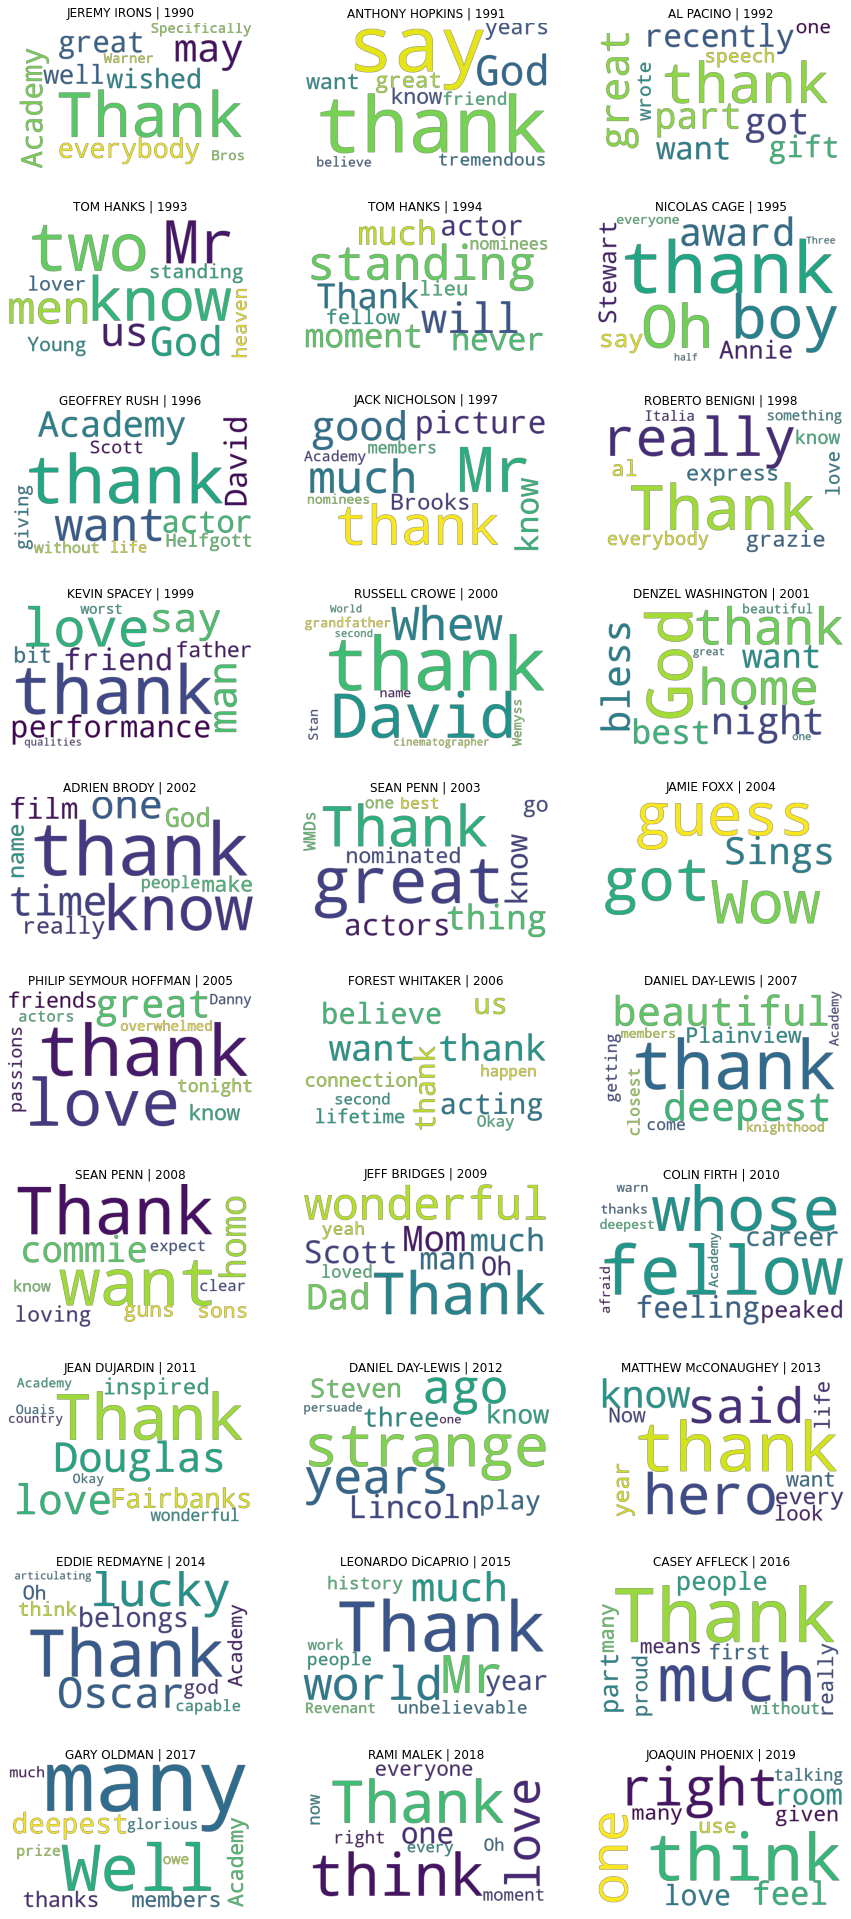

In [140]:
plt.figure(figsize = (15,35)) 

for ii in range(len(oscars['Winner'])):
    wc = WordCloud( width = 500, height = 300, max_words = 10,
                   stopwords = set(STOPWORDS), background_color = None, mode = 'RGBA',
                   contour_width = 0.5, contour_color = 'green').generate(df['SpeechMod'].iloc[ii])
    plt.subplot(10,3,ii+1)
    plt.imshow(wc) 
    plt.axis("off") 
    plt.title(str(oscars['Winner'].iloc[ii]) + ' | ' + str(oscars.index.values[ii]))
    #plt.tight_layout(pad = 0) 

# Exporting to a .pdf file.
import os
os.chdir(r'C:\Users\Habeeb\Documents\Sagun\Python\csv files')
plt.savefig('oscars_WordCloud.pdf', dpi = 300, papertype = 'a4', format = 'pdf')
plt.show()

<hr><hr>

# Sentiment Analysis.

In [141]:
stopwords_list = set(STOPWORDS)

##### The list that contains all the speeches is new_speech. We carry out further filtering.

In [143]:
new_speech[0]

"This is great  Thank you the Academy and thank you everybody who's wished me well for this  Specifically thank you Warner Bros Sovereign Pictures Ed Pressman Barbet Schroeder Luciano Tovoli our lighting cameraman  People who made me look like that Allen Weisinger and Dick Smith  Thank you my co-stars Ron Silver and Glenn for finally persuading me to do it  Thank you Fred Specktor Anne Hutton Sally Fischer  Thank you also and some of you may understand why thank you David Cronenberg  And lastly if I may cut the call of a telephone to London where my wife is trying to keep awake in a hotel bedroom I wish you were here to help me carry this because you helped me win it  Thank you all"

### Removing Stopwords and punctuations.

In [146]:
for ii in range(len(new_speech)):
    new_speech[ii] = re.sub('[^a-zA-Z]', ' ' , new_speech[ii], flags = re.IGNORECASE)
    # We can use '\W' (non - alphanumeric character or non - word character) instead of '[^a-zA-Z]'.

    #Convert into LowerCase.
    new_speech[ii] = new_speech[ii].lower()
    
    y = [ii for ii in new_speech[ii].split() if ii not in stopwords_list]
    y = ' '.join(y)
    new_speech[ii] = y

In [148]:
new_speech[0]

'great thank academy thank everybody wished well specifically thank warner bros sovereign pictures ed pressman barbet schroeder luciano tovoli lighting cameraman people made look allen weisinger dick smith thank co stars ron silver glenn finally persuading thank fred specktor anne hutton sally fischer thank may understand thank david cronenberg lastly may cut call telephone london wife trying keep awake hotel bedroom wish help carry helped win thank'

### Adding the processed text to a new column in df.

In [159]:
df['SpeechProcessed'] = new_speech
df.head(2)

C:\Users\Habeeb\PycharmProjects\SagunShakya\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Speech,SpeechMod,SpeechProcessed
1990,"This is great. Thank you, the Academy, and th...",This is great Thank you the Academy and thank...,great thank academy thank everybody wished wel...
1991,My God. I can't believe it. This is really u...,My God I can't believe it This is really une...,god believe really unexpected s great honor es...


### Creating Lamda functions to calculate polarity and subjectivity.

In [149]:
pol = lambda x: round(TextBlob(x).sentiment.polarity, 2)
sub = lambda x: round(TextBlob(x).sentiment.subjectivity, 2)

#### Creating new columns in the oscars DataFrame and filling them with zeros.

In [156]:
import numpy as np
oscars['Polarity'] = np.zeros(len(oscars.Speech))
oscars['Subjectivity'] = np.zeros(len(oscars.Speech))

In [161]:
oscars['Polarity'] = df['SpeechProcessed'].apply(pol)
oscars['Subjectivity'] = df['SpeechProcessed'].apply(sub)
oscars.head(5)

,Winner,Movie,Speech,Polarity,Subjectivity
1990,JEREMY IRONS,ReversalofFortune,"This is great. Thank you, the Academy, and th...",0.40,0.55
1991,ANTHONY HOPKINS,TheSilenceoftheLambs,My God. I can't believe it. This is really u...,0.49,0.78
1992,AL PACINO,ScentofaWoman,You broke my streak. The last... I was at an ...,0.26,0.57
1993,TOM HANKS,Philadelphia,Here's what I know. I could not be standing h...,0.28,0.52
1994,TOM HANKS,ForrestGump,Thank you. I'm standing here in lieu of my fe...,0.25,0.55


## Visualization using graphs.

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
winnerList = np.array(winnerList)
winnerList

array(['JEREMY IRONS', 'ANTHONY HOPKINS', 'AL PACINO', 'TOM HANKS',
       'TOM HANKS', 'NICOLAS CAGE', 'GEOFFREY RUSH', 'JACK NICHOLSON',
       'ROBERTO BENIGNI', 'KEVIN SPACEY', 'RUSSELL CROWE',
       'DENZEL WASHINGTON', 'ADRIEN BRODY', 'SEAN PENN', 'JAMIE FOXX',
       'PHILIP SEYMOUR HOFFMAN', 'FOREST WHITAKER', 'DANIEL DAY-LEWIS',
       'SEAN PENN', 'JEFF BRIDGES', 'COLIN FIRTH', 'JEAN DUJARDIN',
       'DANIEL DAY-LEWIS', 'MATTHEW McCONAUGHEY', 'EDDIE REDMAYNE',
       'LEONARDO DiCAPRIO', 'CASEY AFFLECK', 'GARY OLDMAN', 'RAMI MALEK',
       'JOAQUIN PHOENIX'], dtype='<U22')

#### Cleaning Process.
- This helps to retain uniqueness in the X - attribute in seaborn.barplot.

In [223]:
np.where(winnerList == 'DANIEL DAY-LEWIS')

(array([17, 22], dtype=int64),)

In [224]:
winnerList[22] = 'DANIEL DAY-LEWIS_2'

In [225]:
np.where(winnerList == 'TOM HANKS')

(array([3, 4], dtype=int64),)

In [226]:
winnerList[4] = winnerList[4] + '_2' 

In [227]:
np.where(winnerList == 'SEAN PENN')

(array([13, 18], dtype=int64),)

In [228]:
winnerList[18] = winnerList[18] + '_2' 

In [229]:
winnerList

array(['JEREMY IRONS', 'ANTHONY HOPKINS', 'AL PACINO', 'TOM HANKS',
       'TOM HANKS_2', 'NICOLAS CAGE', 'GEOFFREY RUSH', 'JACK NICHOLSON',
       'ROBERTO BENIGNI', 'KEVIN SPACEY', 'RUSSELL CROWE',
       'DENZEL WASHINGTON', 'ADRIEN BRODY', 'SEAN PENN', 'JAMIE FOXX',
       'PHILIP SEYMOUR HOFFMAN', 'FOREST WHITAKER', 'DANIEL DAY-LEWIS',
       'SEAN PENN_2', 'JEFF BRIDGES', 'COLIN FIRTH', 'JEAN DUJARDIN',
       'DANIEL DAY-LEWIS_2', 'MATTHEW McCONAUGHEY', 'EDDIE REDMAYNE',
       'LEONARDO DiCAPRIO', 'CASEY AFFLECK', 'GARY OLDMAN', 'RAMI MALEK',
       'JOAQUIN PHOENIX'], dtype='<U22')

### Visualization using multiple plots.

#### 1. Polarity of Winners of Leading Actor category.

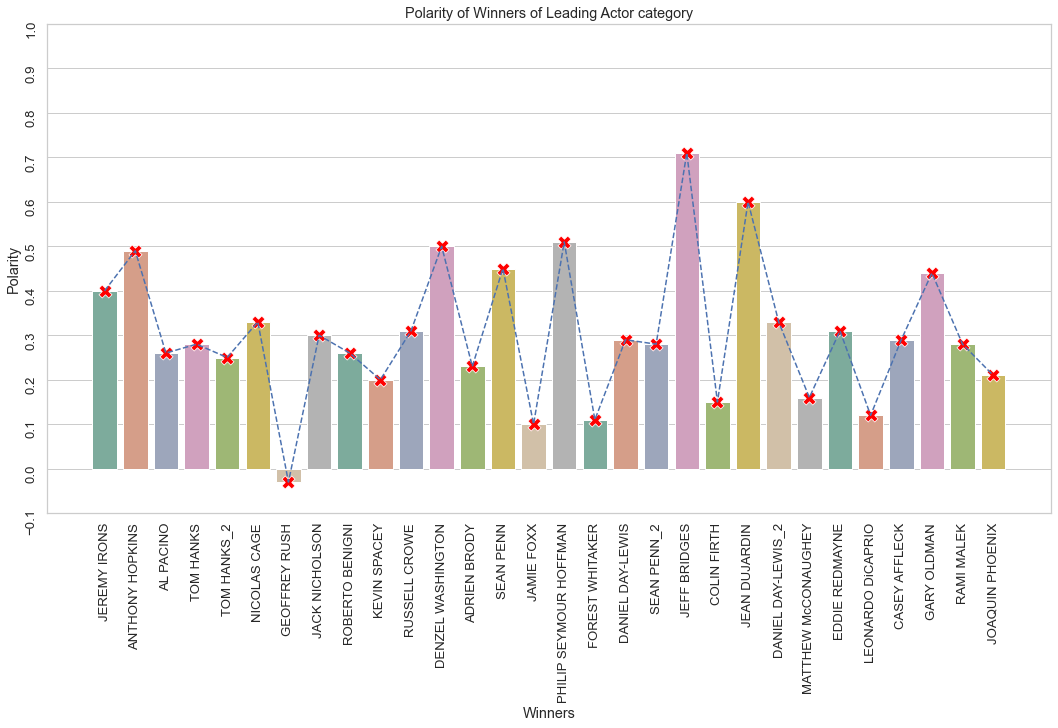

In [245]:
plt.figure(figsize = (18,9))
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.barplot(y = oscars['Polarity'], x = winnerList,
           saturation = 0.5,
           palette = 'Set2',
           dodge = True,
            errwidth = 0,
            zorder = 1)
sns.scatterplot(y = oscars['Polarity'], x = winnerList,
               marker = 'X', s = 170, color = 'red', zorder = 2)

plt.plot(winnerList, oscars['Polarity'].values, 'b--', zorder = 3)
plt.xlabel('Winners')
plt.title('Polarity of Winners of Leading Actor category')
# Use the zorder kwarg where the lower the zorder the further back the plot.
plt.yticks(np.arange(-0.1,1.01,0.1), rotation = 'vertical')
plt.xticks( rotation = 'vertical')
#plt.savefig('Polarity_LeadActors.jpg', dpi = 300, papertype = 'a4', format = 'jpeg')

plt.show()

#### 2. Subjectivity of Winners of Leading Actor category.

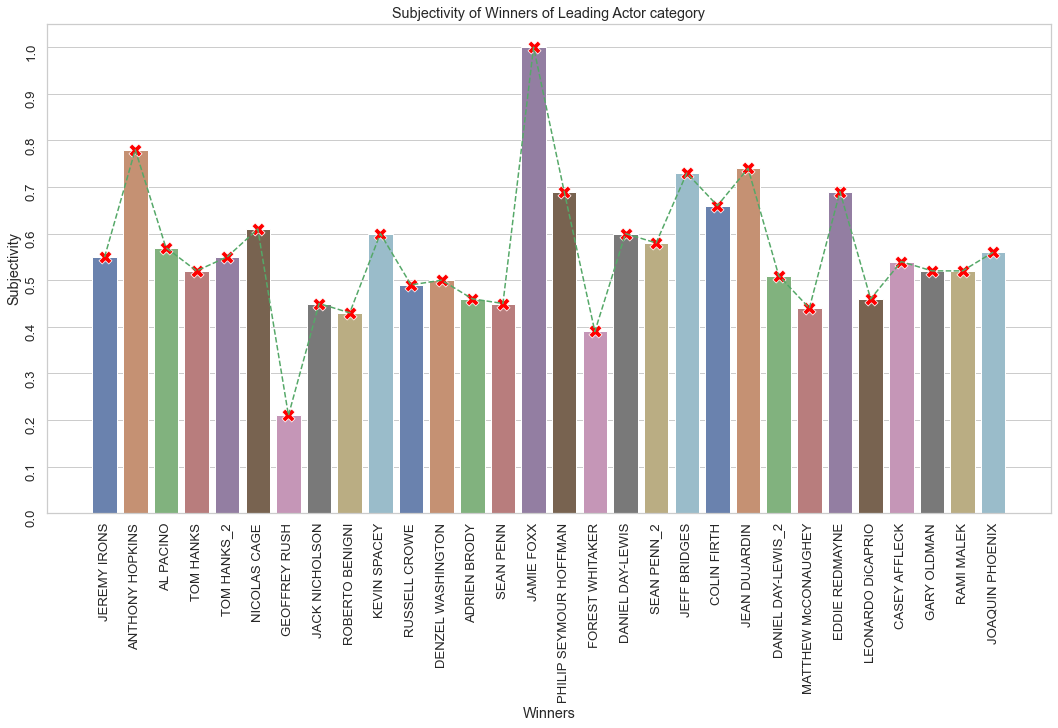

In [246]:
plt.figure(figsize = (18,9))
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.barplot(y = oscars['Subjectivity'], x = winnerList,
           saturation = 0.5,
           palette = 'muted',
           dodge = True,
            errwidth = 0,
            zorder = 1)
sns.scatterplot(y = oscars['Subjectivity'], x = winnerList,
               marker = 'X', s = 170, color = 'red', zorder = 2)

plt.plot(winnerList, oscars['Subjectivity'].values, 'g--', zorder = 3)
plt.xlabel('Winners')
plt.title('Subjectivity of Winners of Leading Actor category')
# Use the zorder kwarg where the lower the zorder the further back the plot.
plt.yticks(np.arange(0.0,1.1,0.1), rotation = 'vertical')
plt.xticks( rotation = 'vertical')

plt.show()

## Word by Word Sentiment Analysis of each Actor.

#### Tokenizing each speech into a dictionary.

In [258]:
tokenDict = dict()
for ii in range(len(yearList)):
    tokenDict[yearList[ii]] = new_speech[ii].split()
    
tokenDict[1991]

['god',
 'believe',
 'really',
 'unexpected',
 's',
 'great',
 'honor',
 'especially',
 'great',
 'actors',
 'nick',
 'nolte',
 'warren',
 'beatty',
 'robin',
 'williams',
 'robert',
 'de',
 'niro',
 'first',
 'say',
 'want',
 'say',
 'hello',
 'mother',
 's',
 'wales',
 'watching',
 'television',
 'eve',
 'jean',
 'jill',
 'tony',
 'father',
 'died',
 'eleven',
 'years',
 'ago',
 'tonight',
 'maybe',
 'something',
 'well',
 'know',
 'want',
 'say',
 'thank',
 'academy',
 'tremendous',
 'generosity',
 'friend',
 'bob',
 'palmer',
 'friend',
 'publicist',
 'dear',
 'beloved',
 'wife',
 'jenni',
 'many',
 'people',
 'thank',
 'los',
 'angeles',
 'years',
 'given',
 'tremendous',
 'support',
 'without',
 'whose',
 'help',
 'know',
 'greatly',
 'honored',
 'tremendously',
 'moved',
 'god',
 'bless',
 'thank',
 'much']

#### Creating a dictionary for Polarity of each word.

In [302]:
polDict = dict()
for ii in yearList:
    polDict[ii] = [pol(tokenDict[ii][jj]) for jj in range(len(tokenDict[ii]))]
    
polDict[2005]

[0.1,
 0.0,
 0.0,
 0.8,
 0.8,
 0.8,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.5,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8,
 0.0,
 0.0,
 0.8,
 0.0,
 0.7,
 0.0]

#### Creating a dictionary for Subjectivity of each word.

In [297]:
subDict = dict()
for ii in yearList:
    subDict[ii] = [sub(tokenDict[ii][jj]) for jj in range(len(tokenDict[ii]))]

### For Polarity.

In [282]:
import matplotlib.gridspec as gridspec

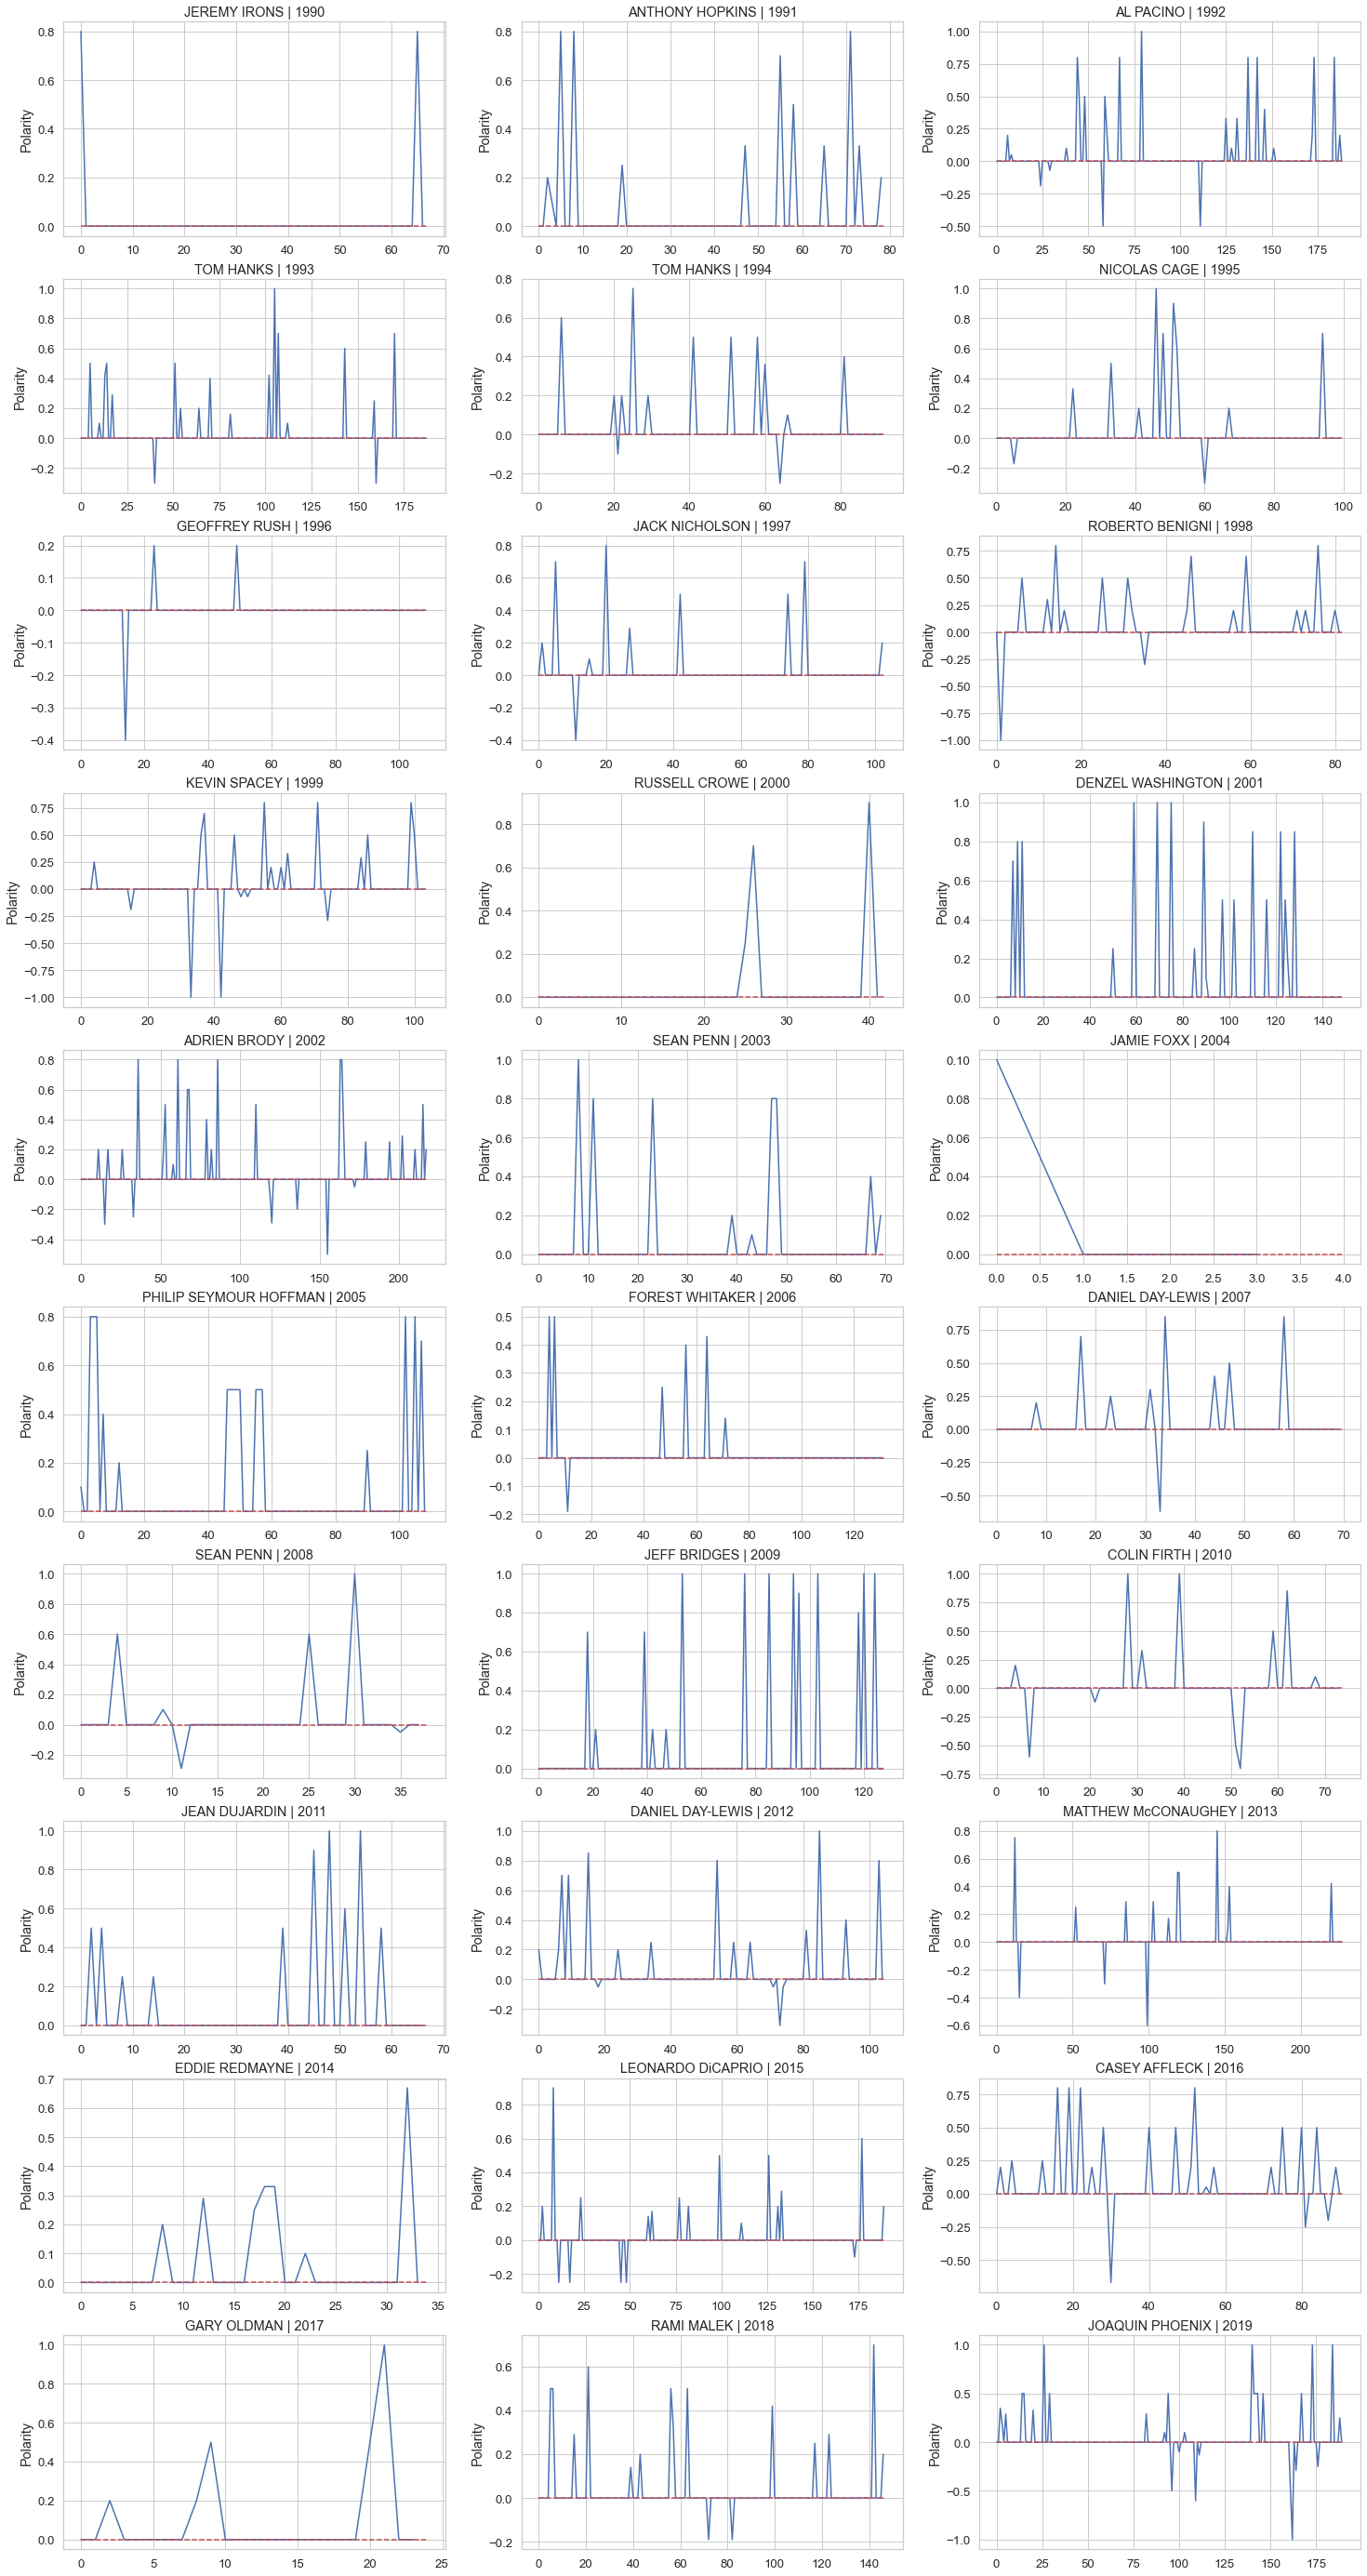

In [299]:
plt.figure(figsize = (25,50))
sns.set(style = 'whitegrid', font_scale = 1.2)

for ii in range(len(oscars['Winner'])):
    plt.subplot(10,3,ii+1)
    plt.plot(np.arange(len(polDict[oscars.index.values[ii]]) ),polDict[oscars.index.values[ii]], zorder = 1)
    
    plt.hlines(0,0,len(polDict[oscars.index.values[ii]]), 
               color = 'r', 
               linewidth = 1.5, 
               linestyle = 'dashed',
               zorder = 2)
    
    plt.ylabel('Polarity')
    plt.title(str(oscars['Winner'].iloc[ii]) + ' | ' + str(oscars.index.values[ii]))

gs = gridspec.GridSpec(10, 3)
# set the space between subplots and the position of the subplots in the figure
gs.update(wspace=0.9, hspace=0.8, left = 0.1, right = 0.3, bottom = 0.1, top = 0.9) 
plt.show()

### For Subjectivity.

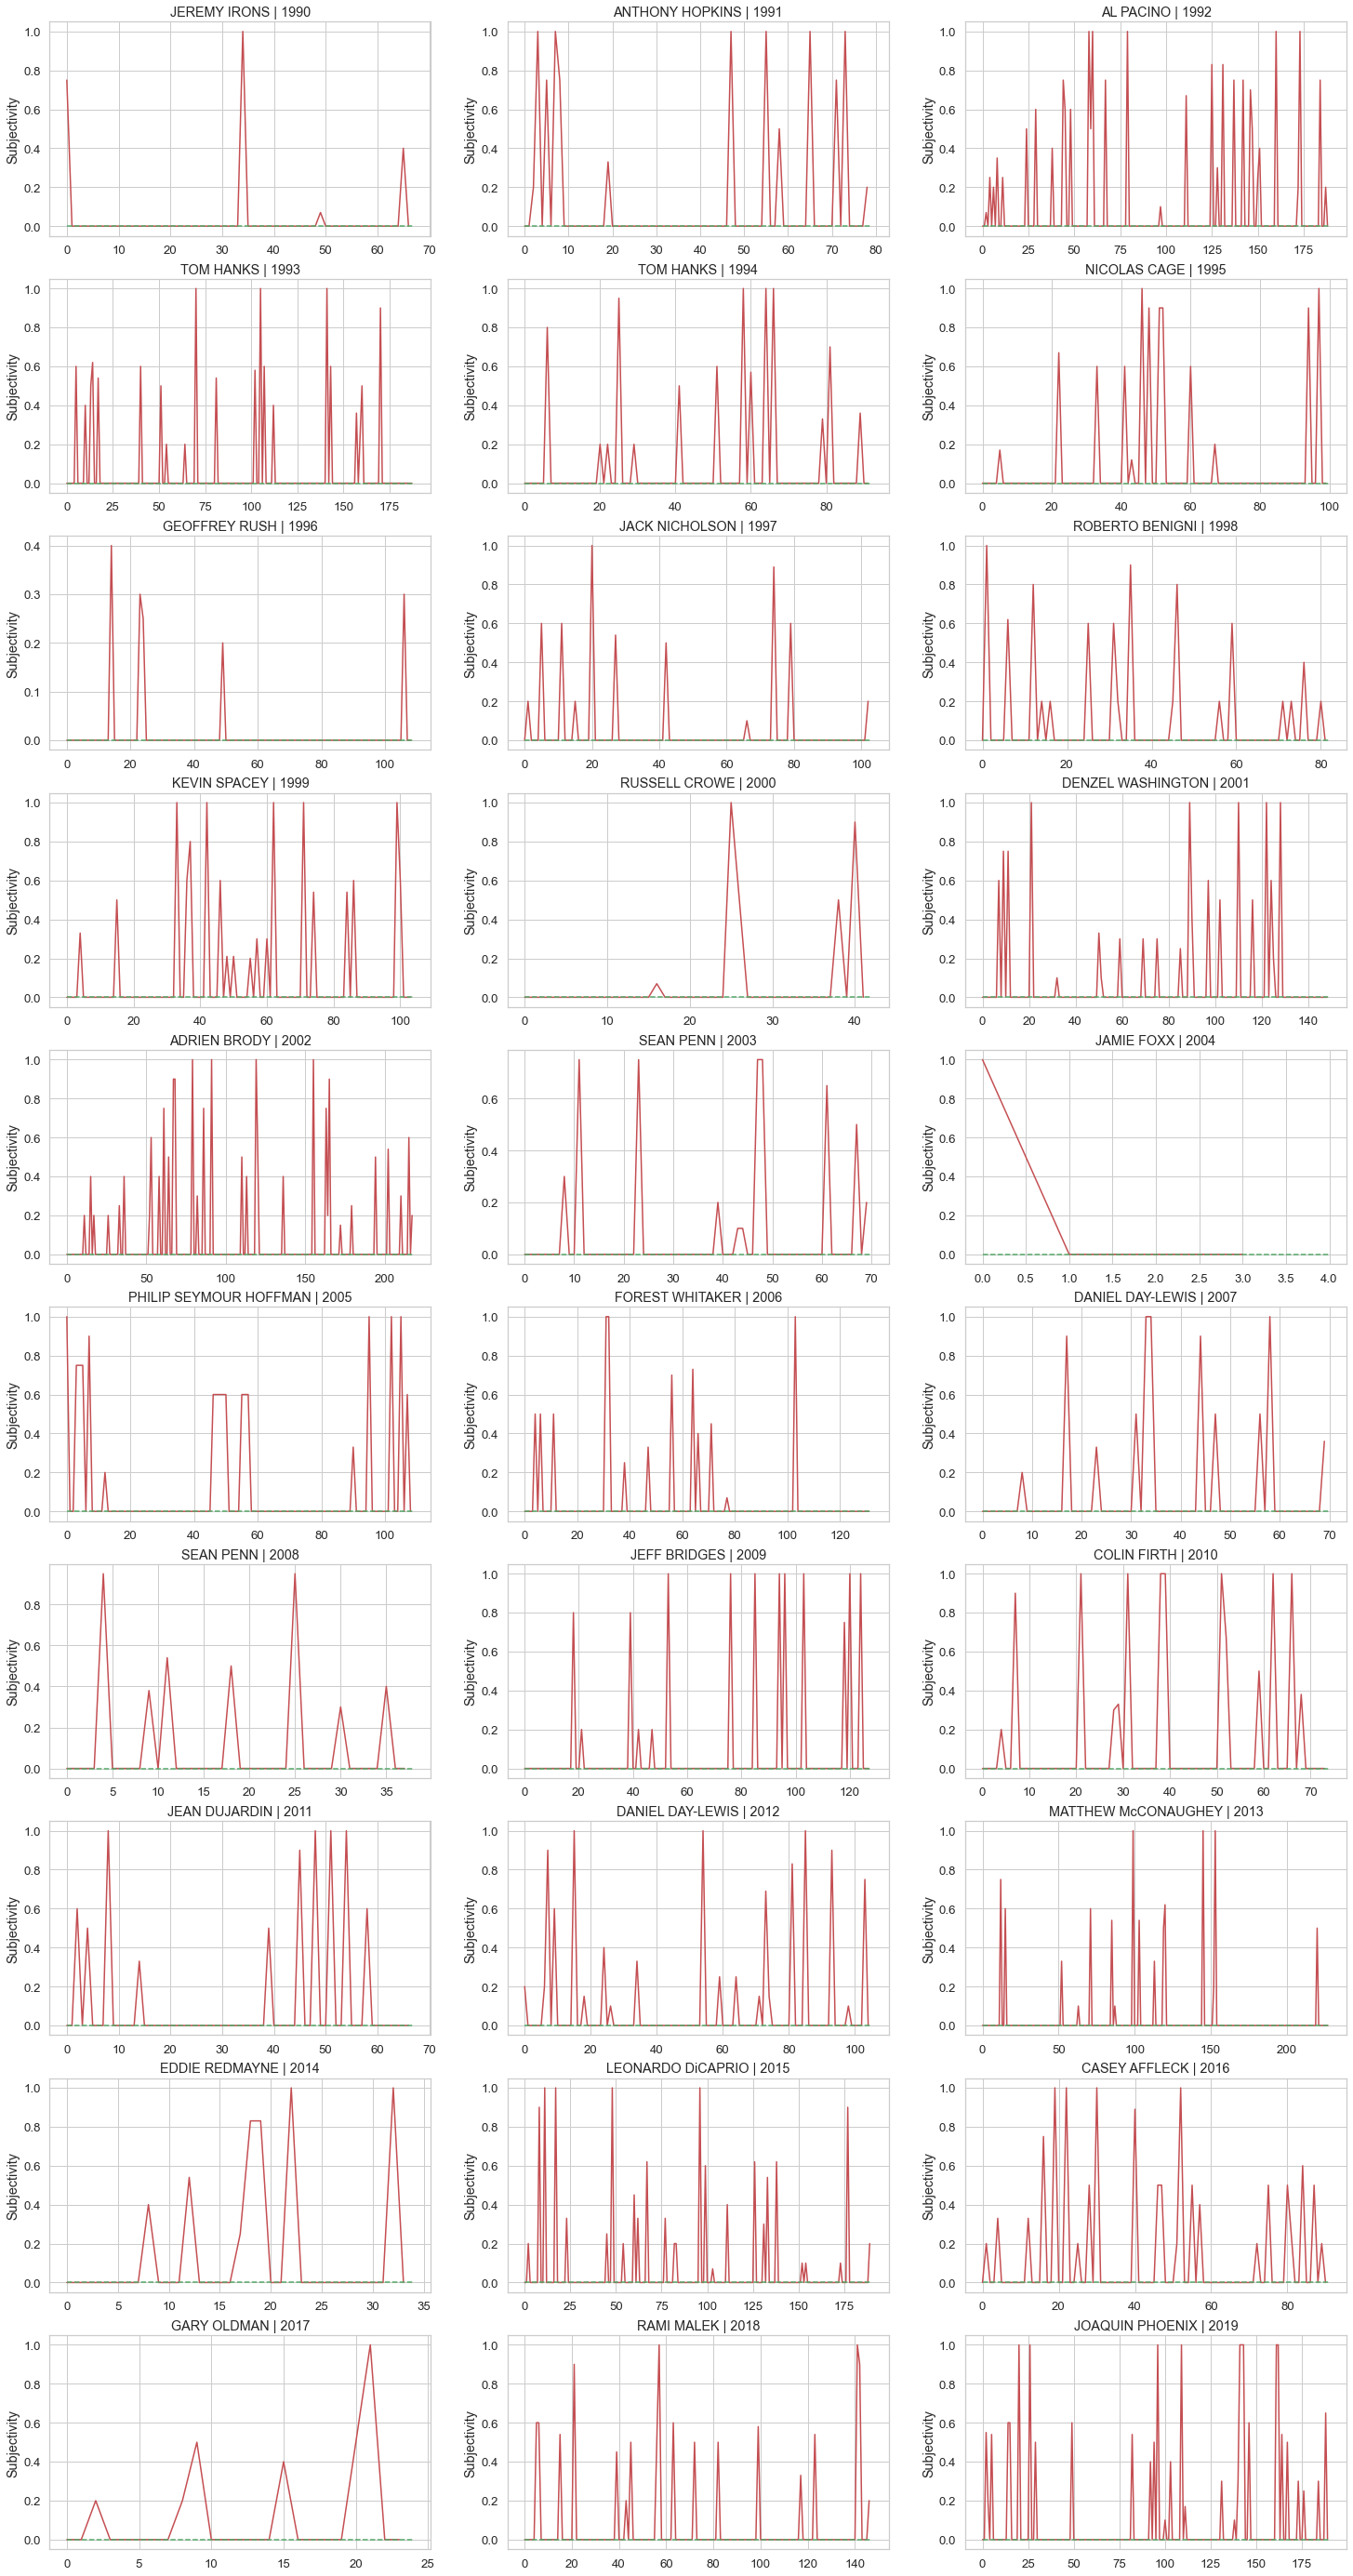

In [300]:
plt.figure(figsize = (25,50))
sns.set(style = 'whitegrid', font_scale = 1.2)

for ii in range(len(oscars['Winner'])):
    plt.subplot(10,3,ii+1)
    plt.plot(np.arange(len(subDict[oscars.index.values[ii]]) ),subDict[oscars.index.values[ii]], zorder = 1, color = 'r')
    plt.hlines(0,0,len(subDict[oscars.index.values[ii]]), color = 'g', zorder = 2, linewidth = 1.5, linestyle = 'dashed')
    
    plt.title(str(oscars['Winner'].iloc[ii]) + ' | ' + str(oscars.index.values[ii]))
    plt.ylabel('Subjectivity')

gs = gridspec.GridSpec(10, 3)
# set the space between subplots and the position of the subplots in the figure
gs.update(wspace=0.9, hspace=0.8, left = 0.1, right = 0.3, bottom = 0.1, top = 0.9) 
plt.show()

#  The End.